In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import scipy
from PIL import Image
from scipy import ndimage
import skimage.io as skio

In [2]:
import gdal
import os
import geopandas as gpd
from skimage import io
from skimage.io import imread
%matplotlib inline

# reading the masked image and visualising it.

In [3]:
masked_image = gdal.Open("E:\\Internship_Harvesting\\Dataset\\DHAR\\Agriculture_Mask_Dhar.tif")
masked_image

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D144958D50> >

In [4]:
masked_image.RasterYSize, masked_image.RasterXSize, masked_image.RasterCount

(4129, 4610, 1)

In [5]:
masked_image_array = masked_image.GetRasterBand(1).ReadAsArray()

In [6]:
np.unique(masked_image_array)

array([0., 1., 2.], dtype=float32)

In [7]:
np.count_nonzero(masked_image_array == 0), np.count_nonzero(masked_image_array == 1), np.count_nonzero(masked_image_array == 2)

(9206015, 3357226, 6471449)

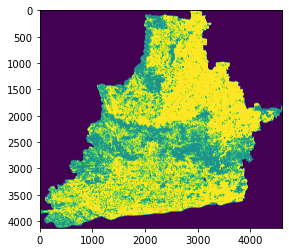

In [8]:
plt.imshow(masked_image_array)
plt.show()

# extracting the indices corresponding to 0(outside DHAR map) and 1(non-agriculture)

In [9]:
masked_0_index = np.argwhere(masked_image_array == 0)

In [10]:
masked_1_index = np.argwhere(masked_image_array == 1)

In [11]:
masked_0_index.shape, masked_1_index.shape

((9206015, 2), (3357226, 2))

In [12]:
masked_0_index

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [4128, 4607],
       [4128, 4608],
       [4128, 4609]], dtype=int64)

In [13]:
masked_1_index

array([[   7, 2949],
       [   7, 2950],
       [   7, 2951],
       ...,
       [4128,  363],
       [4128,  364],
       [4128,  365]], dtype=int64)

In [14]:
masked_0_1_index = np.concatenate((masked_1_index, masked_0_index), axis = 0)

In [15]:
masked_0_1_index.shape

(12563241, 2)

# once we have the non-agriculture indices, we will map these indices in DHAR NDVI images and make new images.

In [81]:
image_path = ["E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Octclip_resized.tif",
             "E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Novclip_resized.tif",
             "E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Decclip_resized.tif",
             "E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Janclip_resized.tif",
             "E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Febclip_resized.tif",
             "E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Marchclip_resized.tif",
             "E:\\Internship_Harvesting\\Dataset\\DHAR\\Dhar_Aprclip_resized.tif"]

In [82]:
DHAR_10 = gdal.Open(image_path[0])
DHAR_11 = gdal.Open(image_path[1])
DHAR_12 = gdal.Open(image_path[2])
DHAR_01 = gdal.Open(image_path[3])
DHAR_02 = gdal.Open(image_path[4])
DHAR_03 = gdal.Open(image_path[5])
DHAR_04 = gdal.Open(image_path[6])

In [83]:
DHAR_10, DHAR_11, DHAR_12, DHAR_01, DHAR_02, DHAR_03, DHAR_04

(<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D1450C6F90> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D138CDB300> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D1412D60F0> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D12EA56A80> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D12EA33780> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D15732E840> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D15732E210> >)

In [84]:
print(DHAR_10.RasterYSize, DHAR_10.RasterXSize, DHAR_10.RasterCount)
print(DHAR_11.RasterYSize, DHAR_11.RasterXSize, DHAR_11.RasterCount)
print(DHAR_12.RasterYSize, DHAR_12.RasterXSize, DHAR_12.RasterCount)
print(DHAR_01.RasterYSize, DHAR_01.RasterXSize, DHAR_01.RasterCount)
print(DHAR_02.RasterYSize, DHAR_02.RasterXSize, DHAR_02.RasterCount)
print(DHAR_03.RasterYSize, DHAR_03.RasterXSize, DHAR_03.RasterCount)
print(DHAR_04.RasterYSize, DHAR_04.RasterXSize, DHAR_04.RasterCount)

4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1


In [85]:
DHAR_10_arr = DHAR_10.GetRasterBand(1).ReadAsArray()
DHAR_11_arr = DHAR_11.GetRasterBand(1).ReadAsArray()
DHAR_12_arr = DHAR_12.GetRasterBand(1).ReadAsArray()
DHAR_01_arr = DHAR_01.GetRasterBand(1).ReadAsArray()
DHAR_02_arr = DHAR_02.GetRasterBand(1).ReadAsArray()
DHAR_03_arr = DHAR_03.GetRasterBand(1).ReadAsArray()
DHAR_04_arr = DHAR_04.GetRasterBand(1).ReadAsArray()

In [94]:
print(np.amax(DHAR_10_arr)), print(np.amin(DHAR_10_arr))
print(np.amax(DHAR_11_arr)), print(np.amin(DHAR_11_arr))
print(np.amax(DHAR_12_arr)), print(np.amin(DHAR_12_arr))
print(np.amax(DHAR_01_arr)), print(np.amin(DHAR_01_arr))
print(np.amax(DHAR_02_arr)), print(np.amin(DHAR_02_arr))
print(np.amax(DHAR_03_arr)), print(np.amin(DHAR_03_arr))
print(np.amax(DHAR_04_arr)), print(np.amin(DHAR_04_arr))

0.79092354
-0.41768882
0.76371783
-0.44318858
0.73769873
-0.34931388
0.83760256
-0.36369726
0.8352584
-0.32591006
0.8071565
-0.38850284
0.8071565
-0.38850284


(None, None)

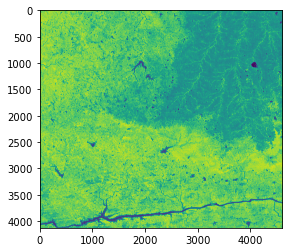

In [87]:
plt.imshow(DHAR_10_arr)
plt.show()

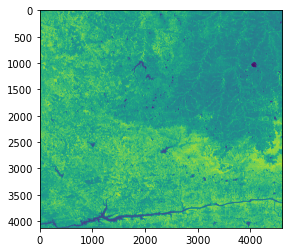

In [88]:
plt.imshow(DHAR_11_arr)
plt.show()

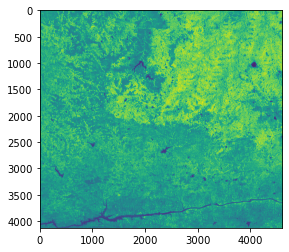

In [89]:
plt.imshow(DHAR_12_arr)
plt.show()

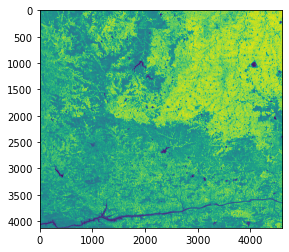

In [90]:
plt.imshow(DHAR_01_arr)
plt.show()

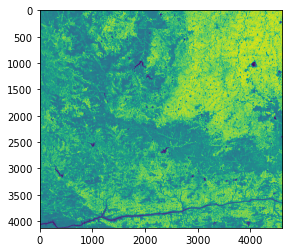

In [91]:
plt.imshow(DHAR_02_arr)
plt.show()

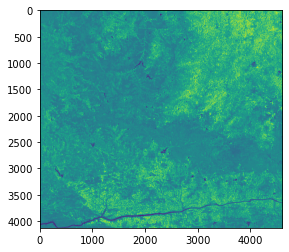

In [92]:
plt.imshow(DHAR_03_arr)
plt.show()

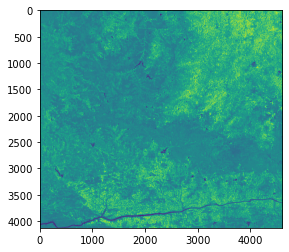

In [93]:
plt.imshow(DHAR_04_arr)
plt.show()

In [95]:
for i in range(masked_0_index.shape[0]):
    DHAR_10_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN
    DHAR_11_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN
    DHAR_12_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN
    DHAR_01_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN
    DHAR_02_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN
    DHAR_03_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN
    DHAR_04_arr[masked_0_index[i,0], masked_0_index[i,1]] = np.NaN

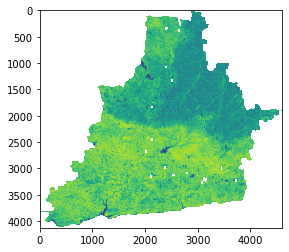

In [96]:
plt.imshow(DHAR_10_arr)
plt.show()

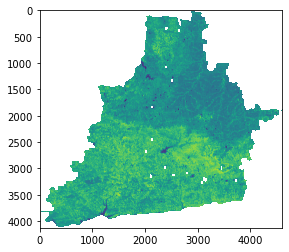

In [97]:
plt.imshow(DHAR_11_arr)
plt.show()

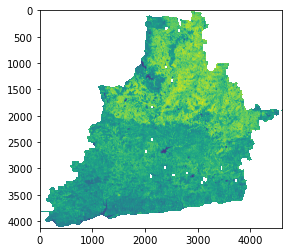

In [98]:
plt.imshow(DHAR_12_arr)
plt.show()

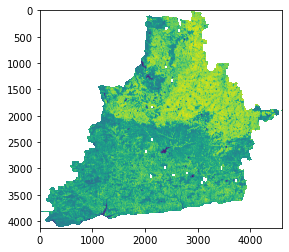

In [99]:
plt.imshow(DHAR_01_arr)
plt.show()

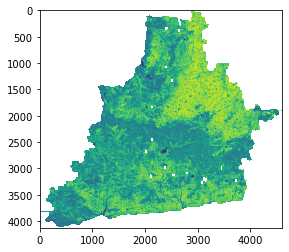

In [100]:
plt.imshow(DHAR_02_arr)
plt.show()

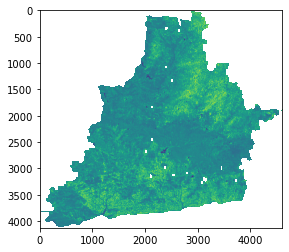

In [101]:
plt.imshow(DHAR_03_arr)
plt.show()

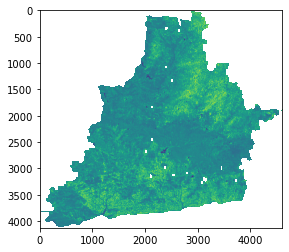

In [102]:
plt.imshow(DHAR_04_arr)
plt.show()

# Assigning value 0 to non-agriculure pixels

In [103]:
for i in range(masked_1_index.shape[0]):
    DHAR_10_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2
    DHAR_11_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2
    DHAR_12_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2
    DHAR_01_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2
    DHAR_02_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2
    DHAR_03_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2
    DHAR_04_arr[masked_1_index[i,0], masked_1_index[i,1]] = 2

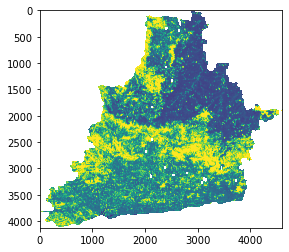

In [104]:
plt.imshow(DHAR_10_arr)
plt.show()

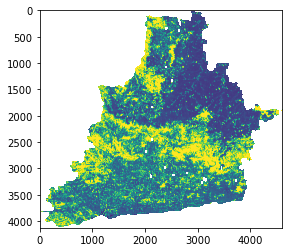

In [105]:
plt.imshow(DHAR_11_arr)
plt.show()

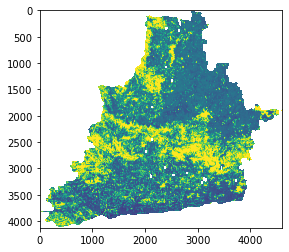

In [106]:
plt.imshow(DHAR_12_arr)
plt.show()

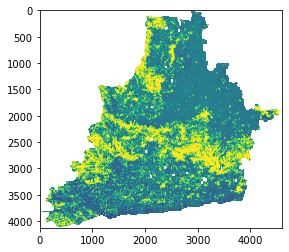

In [107]:
plt.imshow(DHAR_01_arr)
plt.show()

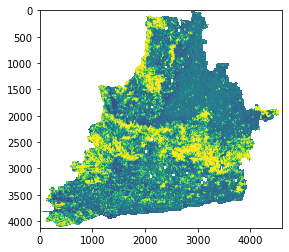

In [108]:
plt.imshow(DHAR_02_arr)
plt.show()

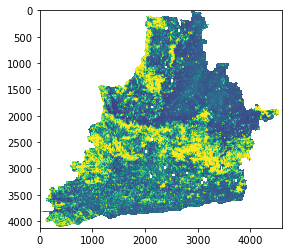

In [109]:
plt.imshow(DHAR_03_arr)
plt.show()

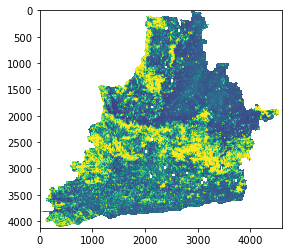

In [110]:
plt.imshow(DHAR_04_arr)
plt.show()

# counting agriculture pixels and non-agriculture pixels

#### Inside DHAR map, counting number of agriculture and non-agriculture pixels

In [116]:
print(np.count_nonzero(DHAR_10_arr == 2), np.count_nonzero(DHAR_10_arr != 2))
print(np.count_nonzero(DHAR_11_arr == 2), np.count_nonzero(DHAR_11_arr != 2))
print(np.count_nonzero(DHAR_12_arr == 2), np.count_nonzero(DHAR_12_arr != 2))
print(np.count_nonzero(DHAR_01_arr == 2), np.count_nonzero(DHAR_01_arr != 2))
print(np.count_nonzero(DHAR_02_arr == 2), np.count_nonzero(DHAR_02_arr != 2))
print(np.count_nonzero(DHAR_03_arr == 2), np.count_nonzero(DHAR_03_arr != 2))
print(np.count_nonzero(DHAR_04_arr == 2), np.count_nonzero(DHAR_04_arr != 2))

3357226 15677464
3357226 15677464
3357226 15677464
3357226 15677464
3357226 15677464
3357226 15677464
3357226 15677464


#### counting number of pixels outside DHAR map

In [118]:
print(np.count_nonzero(np.isnan(DHAR_10_arr)))
print(np.count_nonzero(np.isnan(DHAR_11_arr)))
print(np.count_nonzero(np.isnan(DHAR_12_arr)))
print(np.count_nonzero(np.isnan(DHAR_01_arr)))
print(np.count_nonzero(np.isnan(DHAR_02_arr)))
print(np.count_nonzero(np.isnan(DHAR_03_arr)))
print(np.count_nonzero(np.isnan(DHAR_04_arr)))

9206015
9206015
9206015
9206015
9206015
9206015
9206015


In [68]:
print(np.count_nonzero(np.isnan(DHAR_10_arr)), np.count_nonzero(~np.isnan(DHAR_10_arr)))
print(np.count_nonzero(np.isnan(DHAR_11_arr)), np.count_nonzero(~np.isnan(DHAR_11_arr)))
print(np.count_nonzero(np.isnan(DHAR_12_arr)), np.count_nonzero(~np.isnan(DHAR_12_arr)))
print(np.count_nonzero(np.isnan(DHAR_01_arr)), np.count_nonzero(~np.isnan(DHAR_01_arr)))
print(np.count_nonzero(np.isnan(DHAR_02_arr)), np.count_nonzero(~np.isnan(DHAR_02_arr)))
print(np.count_nonzero(np.isnan(DHAR_03_arr)), np.count_nonzero(~np.isnan(DHAR_03_arr)))
print(np.count_nonzero(np.isnan(DHAR_04_arr)), np.count_nonzero(~np.isnan(DHAR_04_arr)))

9206015 9828675
9206015 9828675
9206015 9828675
9206015 9828675
9206015 9828675
9206015 9828675
9206015 9828675


# Saving the masked images as a separate file

In [120]:
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_10_masked.tif", DHAR_10_arr)
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_11_masked.tif", DHAR_11_arr)
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_12_masked.tif", DHAR_12_arr)
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_01_masked.tif", DHAR_01_arr)
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_02_masked.tif", DHAR_02_arr)
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_03_masked.tif", DHAR_03_arr)
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\masked\\DHAR_04_masked.tif", DHAR_04_arr)